# Trabajo práctico 1. Fraude en tarjetas

Una plataforma de ventas online nos contrata para que realicemos un modelo que nos
permita detectar un posible fraude dada cierta operación para ello contamos con un dataset
que contiene las siguientes columnas:

● Step: representa una unidad de tiempo donde 1 step equivale a 1 hora

● type: tipo de transacción en línea

● amount: el importe de la transacción

● nameOrig: cliente que inicia la transacción

● oldbalanceOrg: saldo antes de la transacción

● newbalanceOrig: saldo después de la transacción

● nameDest: destinatario de la transacción

● oldbalanceDest: saldo inicial del destinatario antes de la transacción

● newbalanceDest: el nuevo saldo del destinatario después de la transacción

● isFraud: transacción fraudulenta

Utilizando los modelos de clasificación vistos hasta el momento generar un notebook que
permita de ser posible resolver el problema que nos está planteando el cliente.

IMPORTANTE
Sabemos que por cada transacción aprobada el porcentaje de ganancia es de un
20%, y por cada fraude aprobado se pierde el 100% del dinero de la transacción.
Realizar un análisis y determinar un modelo que permita maximizar la ganancia de la empresa.

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset


## 1. Obtención de datos

Para esta práctica vamos a usar el siguiente dataset

https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

In [1]:
# Cambiar a lo que corresponda
DATASET_PATH = "..\\data\\datos_tp1"


In [2]:
!dir {DATASET_PATH}

 El volumen de la unidad D es Datos
 El n�mero de serie del volumen es: 24D1-CEDE

 Directorio de d:\Users\juanp_schamun\Documents\GitRepositories\CEIA\AM1\aprendizaje_maquina_I\data\datos_tp1

11/03/2023  02:09 p.m.    <DIR>          .
11/03/2023  02:09 p.m.    <DIR>          ..
11/03/2023  12:56 p.m.       493,534,783 PS_20174392719_1491204439457_log.csv
               1 archivos    493,534,783 bytes
               2 dirs  323,689,377,792 bytes libres


In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Importamos librerias necesarias para validacion del modelo
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


# librerias de Modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.preprocessing import OneHotEncoder

## 2. Análisis exploratorio inicial

In [27]:
df = pd.read_csv(DATASET_PATH+"/PS_20174392719_1491204439457_log.csv")
# saco una muestra más chica para acelerar el proceso de pruebas
dfm = df.sample(100000)

In [28]:
dfm['isFraud'].value_counts(normalize=True)

0    0.99867
1    0.00133
Name: isFraud, dtype: float64

In [29]:
df['isFraud'].value_counts(normalize=True)

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

Obtener alguna información básica

In [30]:
dfm.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,243.520820,1.775261e+05,8.413742e+05,8.621159e+05,1.094757e+06,1.217888e+06,0.001330,0.000010
std,142.692558,5.796152e+05,2.921531e+06,2.956696e+06,3.344710e+06,3.670048e+06,0.036445,0.003162
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.317606e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,239.000000,7.444473e+04,1.373800e+04,0.000000e+00,1.279151e+05,2.082575e+05,0.000000,0.000000
75%,335.000000,2.074433e+05,1.074440e+05,1.433870e+05,9.328319e+05,1.101985e+06,0.000000,0.000000
max,741.000000,3.867804e+07,3.444764e+07,3.443241e+07,2.362305e+08,3.114049e+08,1.000000,1.000000


In [44]:
dfm[['isFraud']].value_counts()


isFraud
0          99867
1            133
dtype: int64

In [39]:
dfm.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5221132,370,PAYMENT,16531.10,C431649404,11483.00,0.00,M887132549,0.00,0.00,0,0
2412884,202,CASH_IN,392426.22,C1627843516,4352734.23,4745160.45,C479962124,887132.78,494706.56,0,0
3866605,283,CASH_OUT,29309.18,C609258554,253291.00,223981.82,C1710158512,1941924.58,1971233.77,0,0
5665205,396,CASH_OUT,16514.09,C284188092,30160.00,13645.91,C2114040018,4720419.11,4736933.20,0,0
1979546,179,TRANSFER,67939.70,C1291830719,928.00,0.00,C235308568,1946416.75,2014356.46,0,0


In [32]:
dfm.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1495339,142,CASH_OUT,254478.61,C788229608,0.0,0.00,C243555592,14636320.38,14890798.99,0,0
2874665,227,CASH_OUT,280058.75,C854022782,0.0,0.00,C643677527,1467888.15,1759870.08,0,0
5923258,404,CASH_OUT,109518.16,C844182795,0.0,0.00,C116354491,315431.57,424949.73,0,0
3176938,238,CASH_IN,222406.01,C2034671194,28601.0,251007.01,C772800878,22817.04,0.00,0,0
3623538,274,CASH_IN,2681.79,C1545218939,12133.0,14814.79,C2088335928,665269.07,662587.28,0,0


In [146]:
# analizamos la variable nameDest

df['nameDest'].value_counts()

# No parece aportar mucha data en principio

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

## 3. Gráficos

In [46]:
dfm2=df.sample(5000)
dfm2['isFraud'].value_counts(normalize=True)

0    0.9984
1    0.0016
Name: isFraud, dtype: float64

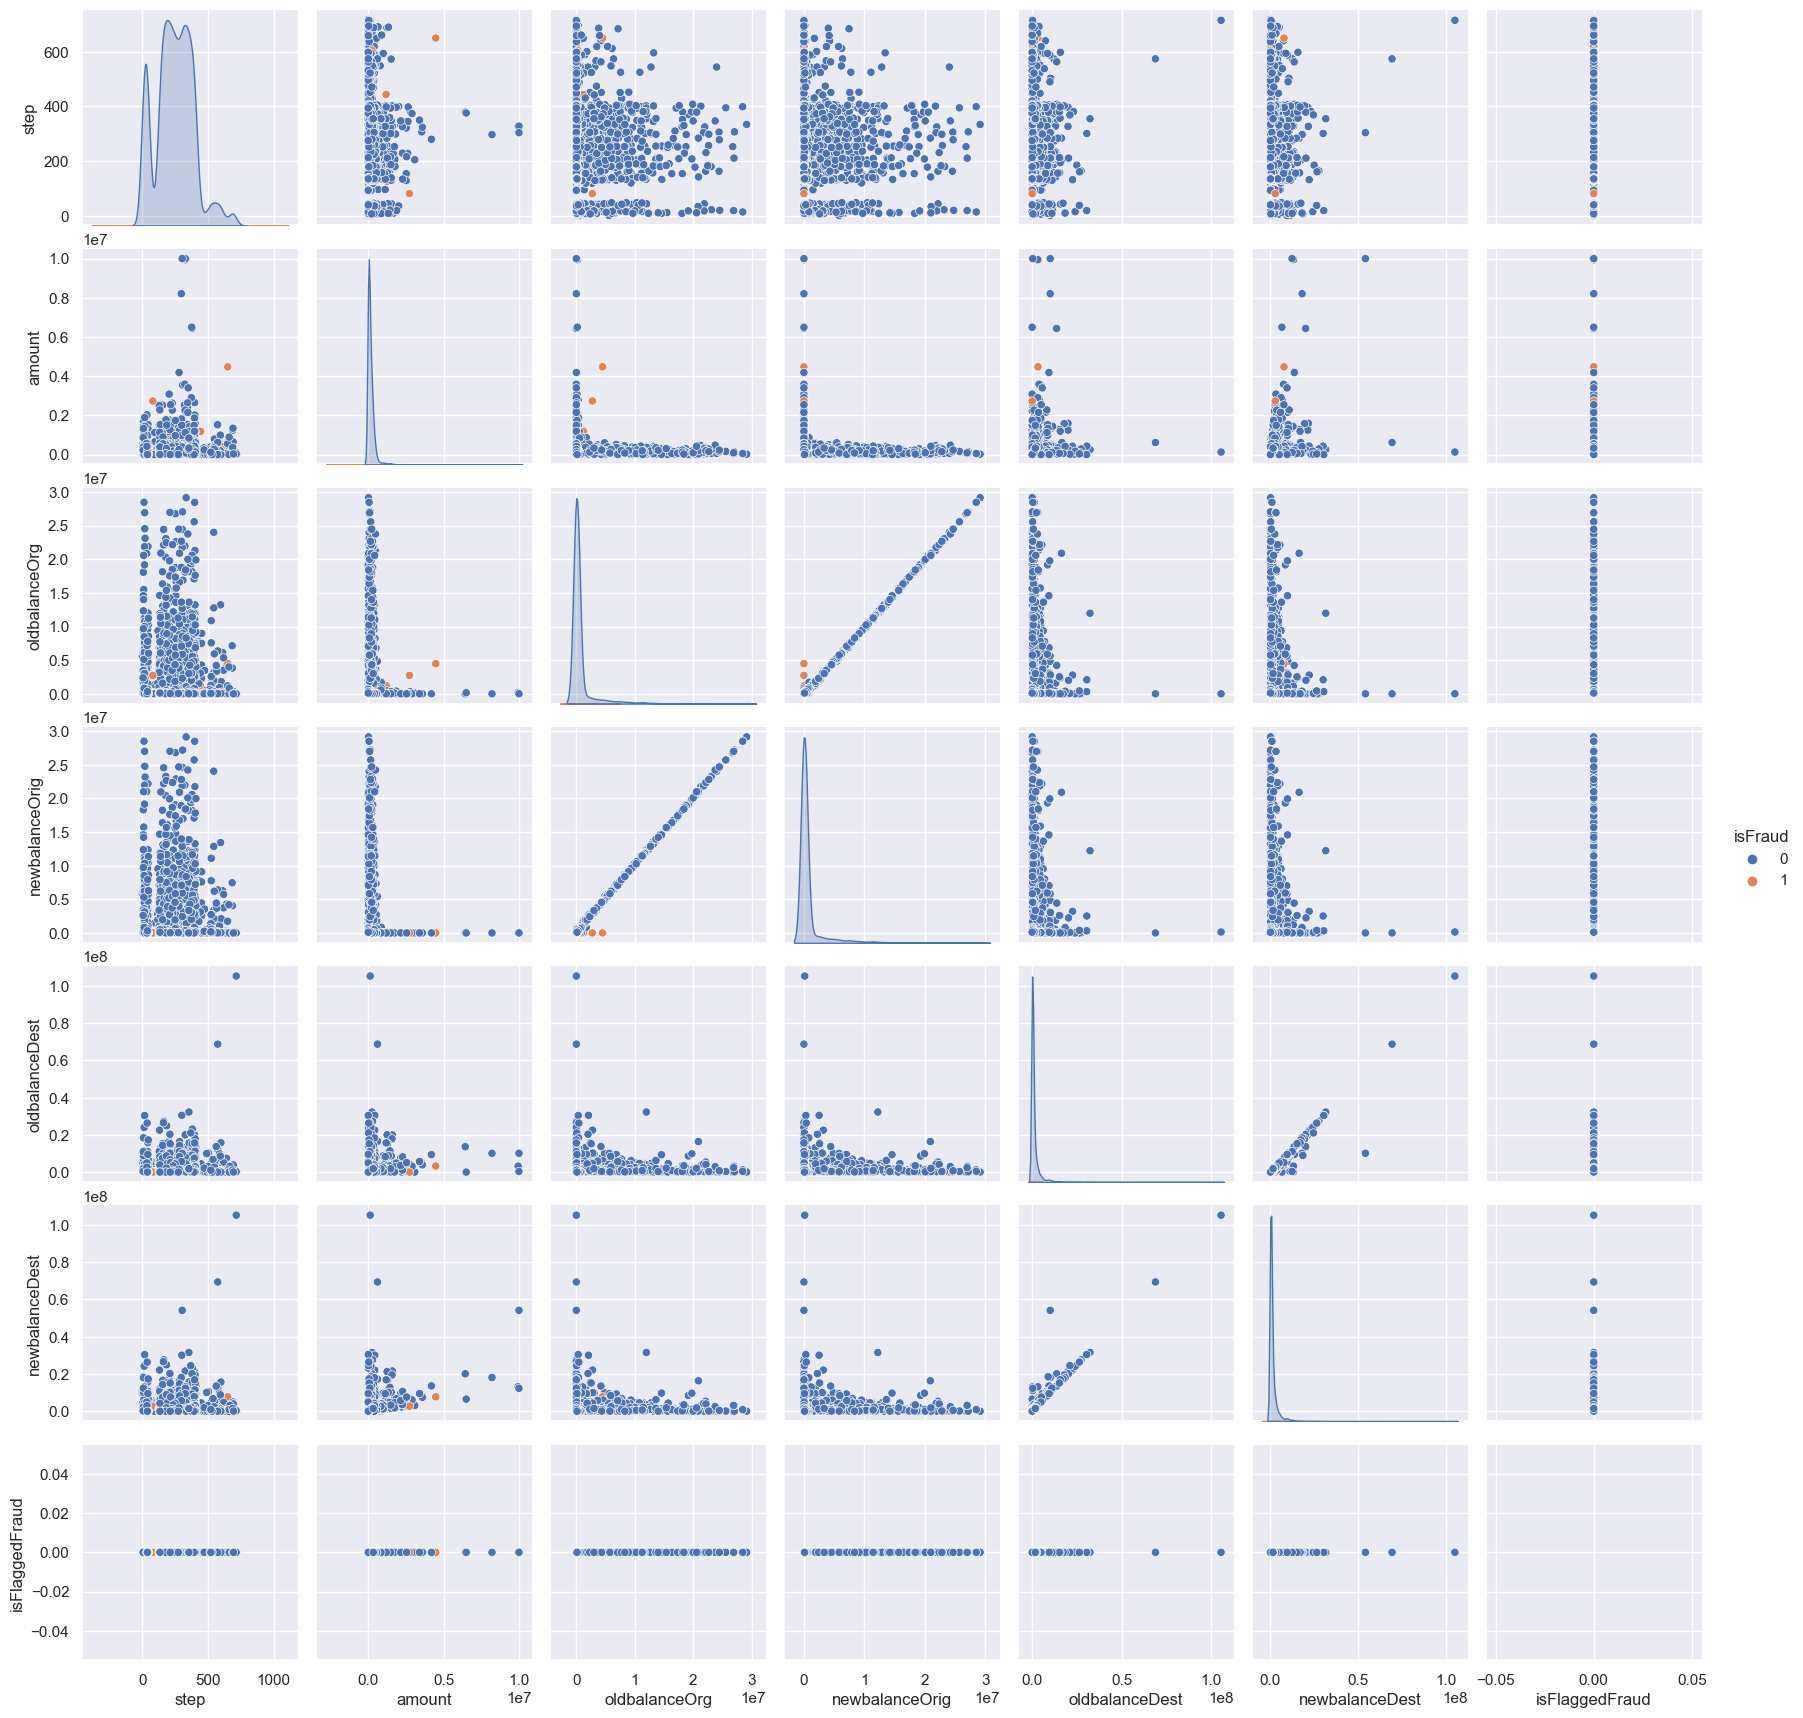

In [140]:
sns.pairplot(dfm2, hue='isFraud')

<Axes: xlabel='type', ylabel='Percent'>

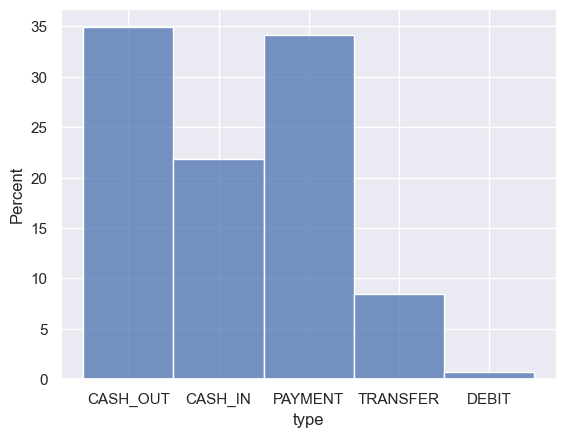

In [103]:
sns.histplot(data=dfm, x='type', stat="percent", discrete=True)

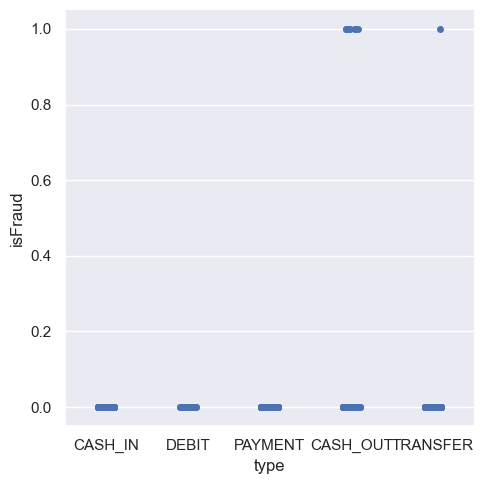

In [144]:
sns.catplot(data=dfm2, x="type", y="isFraud")

In [108]:
df[['isFraud', 'type']].value_counts(normalize=False)

isFraud  type    
0        CASH_OUT    2233384
         PAYMENT     2151495
         CASH_IN     1399284
         TRANSFER     528812
         DEBIT         41432
1        CASH_OUT       4116
         TRANSFER       4097
dtype: int64

Se nota que solo hay Fraude en las transferencias y los retiros. Lo cual tiene sentido.
Analizaremos estos

In [117]:
# Nuevo DF solo con transferencias y retiros
dfToC = df[df['type'].isin(['CASH_OUT', 'TRANSFER'])]

In [120]:
dfToC['isFraud'].value_counts(normalize=True)

0    0.997035
1    0.002965
Name: isFraud, dtype: float64

In [93]:
dfm['isFraud'].value_counts()

0    99867
1      133
Name: isFraud, dtype: int64

## 4. Modelo

In [262]:
# Separamos Features de labels
X = df.iloc[:,:-2]
y = df['isFraud']
# Elimino nameOrig y nameDest ya que considero que no aportan y son categóricas, lo cual además me implica problemas
X.drop(['nameOrig','nameDest'], axis=1, inplace=True)

In [263]:
X['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [264]:
X

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,TRANSFER,850002.52,850002.52,0.00,0.00,0.00


In [265]:
# Por ultimo debo encodear la variable categórica type para que funcione la implementacion

dummies = pd.get_dummies(X['type'], prefix='type_')
X = pd.concat([X,dummies], axis=1).drop(['type'], axis=1)
X
#ohe = OneHotEncoder
#ohe.fit_transform(X[['type']])
#transformed = ohe.fit_transform(X[['type']])

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1


In [266]:
# Generamos sets de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)


In [267]:
# Modelo
model = DecisionTreeClassifier(max_depth=4,criterion='entropy')
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

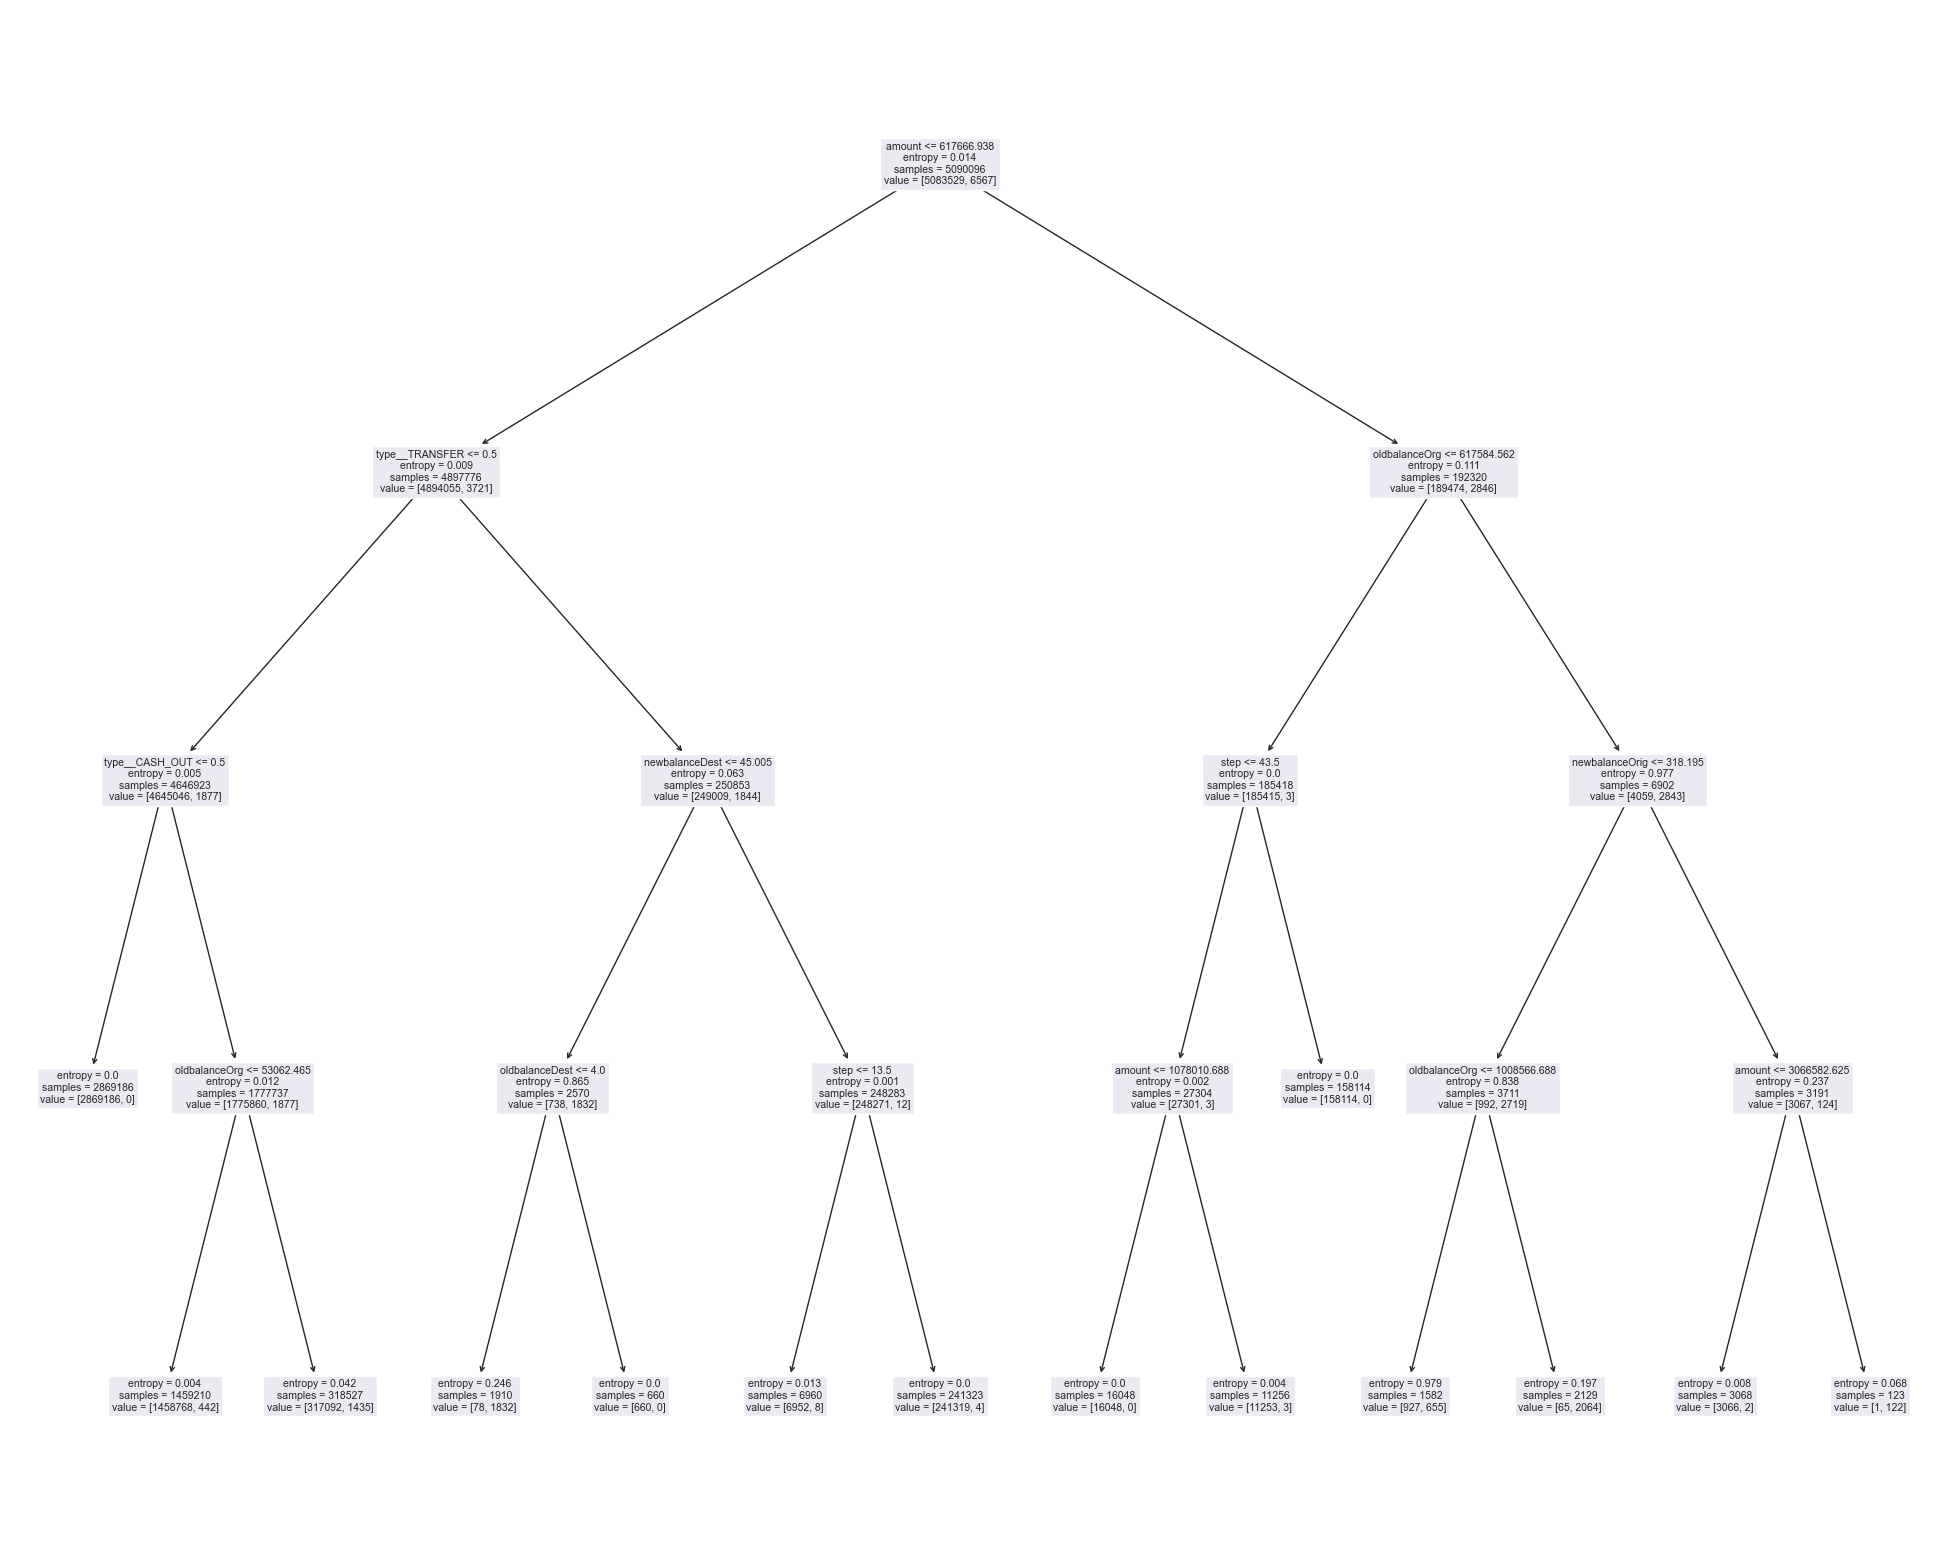

In [268]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=X.columns)

Importancia de las features

In [269]:
featuresImportance=pd.DataFrame(X.columns)
featuresImportance['Importance'] = model.feature_importances_
featuresImportance.sort_values(by='Importance', ascending=False)

,0,Importance
2,oldbalanceOrg,0.353064
5,newbalanceDest,0.262092
1,amount,0.156153
10,type__TRANSFER,0.085384
3,newbalanceOrig,0.056759
7,type__CASH_OUT,0.051261
4,oldbalanceDest,0.034524
0,step,0.000762
6,type__CASH_IN,0.000000
8,type__DEBIT,0.000000


### Validacion

In [270]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [271]:
accuTrain = accuracy_score(y_pred=y_pred_train, y_true=y_train)
accuTest = accuracy_score

print('Accuracy Train = ', accuTrain)
print('Accuracy Test = ', accuTest)

Accuracy Train =  0.999470933357642
Accuracy Test =  <function accuracy_score at 0x0000027B8AE79BC0>


In [272]:
confuMatrixTrain = confusion_matrix(y_pred=y_pred_train, y_true=y_train)
confuMatrixTest = confusion_matrix(y_pred=y_pred_test, y_true=y_test)

print('Confu Train = \n', confuMatrixTrain)
print('Confu Test = \n', confuMatrixTest)

Confu Train = 
 [[5083385     144]
 [   2549    4018]]
Confu Test = 
 [[1270846      32]
 [    660     986]]


In [273]:
recallTrain = recall_score(y_pred=y_pred_train, y_true=y_train)
recallTest = recall_score(y_pred=y_pred_test, y_true=y_test)

print('Recall Train = ', recallTrain)
print('Recall Test = ', recallTest)

Recall Train =  0.6118471143596772
Recall Test =  0.5990279465370595


## 5. Conclusiones



## Referencias

